In [1]:
# Install any required packages (run this first)
!pip install pandas numpy matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
from google.colab import files
uploaded = files.upload()

# Let's see what file was uploaded
print("Uploaded files:", list(uploaded.keys()))

Saving Sample - Superstore.csv to Sample - Superstore.csv
Uploaded files: ['Sample - Superstore.csv']


In [4]:
# Try different common encodings
encodings_to_try = ['latin-1', 'ISO-8859-1', 'cp1252', 'utf-16']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv('Sample - Superstore.csv', encoding=encoding)
        print(f"✅ Success with encoding: {encoding}")
        print(f"Dataset Shape: {df.shape}")
        print("First few columns:", df.columns.tolist()[:5])
        break
    except UnicodeDecodeError as e:
        print(f"❌ Failed with encoding: {encoding} - {e}")
    except Exception as e:
        print(f"❌ Failed with encoding: {encoding} - {e}")

✅ Success with encoding: latin-1
Dataset Shape: (9994, 21)
First few columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode']


In [5]:
# Get detailed information about columns and data types
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Basic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64

In [6]:
# Let's see what the data actually looks like
print("FIRST 5 ROWS OF THE DATASET:")
df.head()

FIRST 5 ROWS OF THE DATASET:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Get column information and data types
print("DATASET INFORMATION:")
print(df.info())
print("\n" + "="*60)
print("COLUMN NAMES:")
print(df.columns.tolist())
print("\n" + "="*60)
print("CHECKING FOR MISSING VALUES:")
print(df.isnull().sum())

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   

In [8]:
# Convert Order Date and Ship Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print("Date columns converted successfully!")
print(f"Order Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Ship Date range: {df['Ship Date'].min()} to {df['Ship Date'].max()}")

Date columns converted successfully!
Order Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
Ship Date range: 2014-01-07 00:00:00 to 2018-01-05 00:00:00


In [9]:
# Create new columns for analysis
# 1. Profit Margin (Percentage)
df['Profit Margin'] = (df['Profit'] / df['Sales'] * 100).round(2)

# 2. Shipping Days (Time between order and shipment)
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# 3. Extract Year and Month from Order Date for time series analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Year-Month'] = df['Order Date'].dt.to_period('M')

print("New columns created successfully!")
print("\nSample of new columns:")
df[['Order Date', 'Ship Date', 'Shipping Days', 'Profit Margin', 'Order Year-Month']].head()

New columns created successfully!

Sample of new columns:


,Order Date,Ship Date,Shipping Days,Profit Margin,Order Year-Month
0,2016-11-08,2016-11-11,3,16.00,2016-11
1,2016-11-08,2016-11-11,3,30.00,2016-11
2,2016-06-12,2016-06-16,4,47.00,2016-06
3,2015-10-11,2015-10-18,7,-40.00,2015-10
4,2015-10-11,2015-10-18,7,11.25,2015-10


In [10]:
# Check for any potential data issues
print("DATA QUALITY CHECKS:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Number of negative profit values: {(df['Profit'] < 0).sum()}")
print(f"Number of zero or negative sales: {(df['Sales'] <= 0).sum()}")
print(f"Shipping Days statistics: Min={df['Shipping Days'].min()}, Max={df['Shipping Days'].max()}")

DATA QUALITY CHECKS:
Number of duplicate rows: 0
Number of negative profit values: 1871
Number of zero or negative sales: 0
Shipping Days statistics: Min=0, Max=7


In [11]:
# Overall business metrics
print("OVERALL BUSINESS PERFORMANCE (2014-2017)")
print("=" * 50)

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
avg_profit_margin = df['Profit Margin'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"Orders with Negative Profit: {1871} ({1871/9994*100:.1f}% of all orders)")

OVERALL BUSINESS PERFORMANCE (2014-2017)
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5,009
Total Customers: 793
Average Profit Margin: 12.03%
Orders with Negative Profit: 1871 (18.7% of all orders)


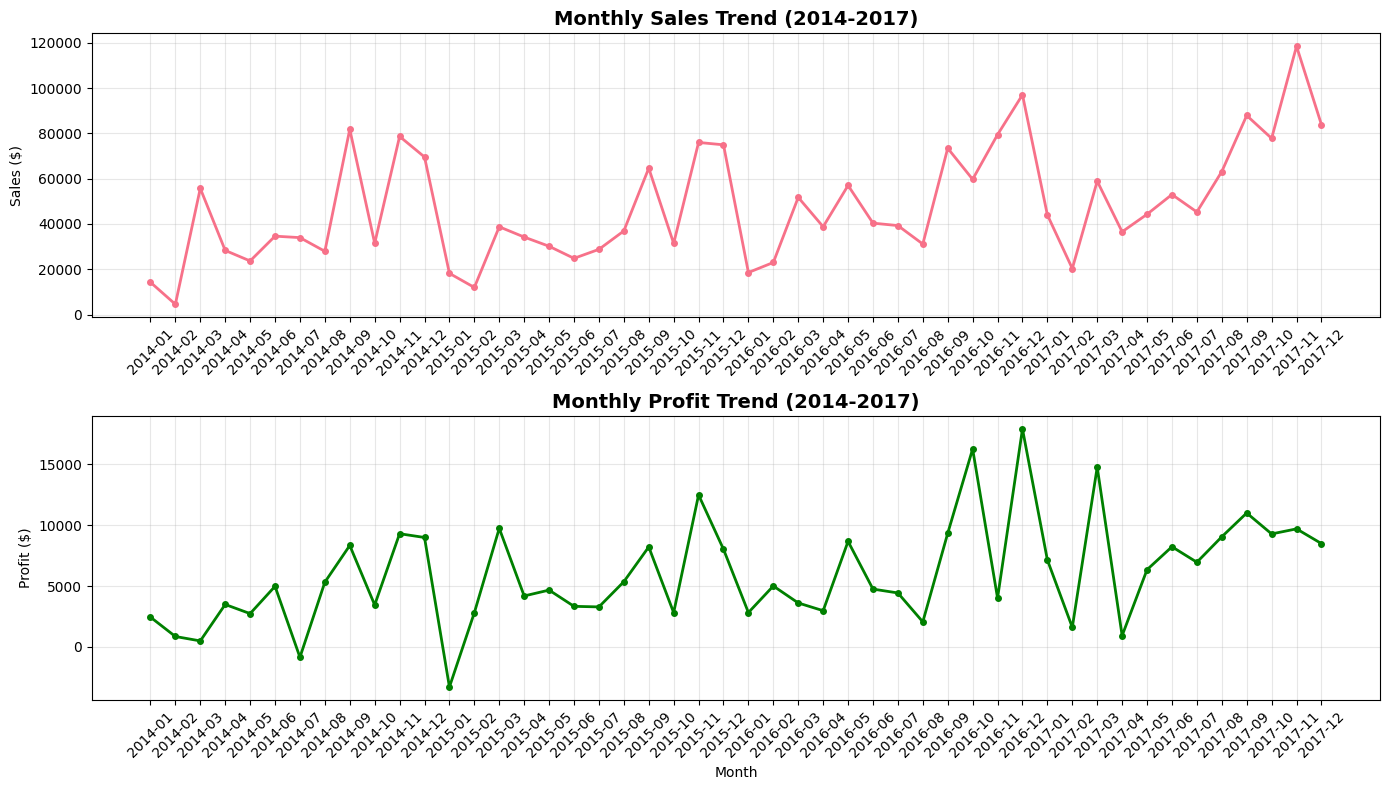

In [12]:
# Monthly sales and profit trend
monthly_trend = df.groupby('Order Year-Month').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).reset_index()
monthly_trend['Order Year-Month'] = monthly_trend['Order Year-Month'].astype(str)

# Create the trend visualization
plt.figure(figsize=(14, 8))

# Sales trend
plt.subplot(2, 1, 1)
plt.plot(monthly_trend['Order Year-Month'], monthly_trend['Sales'], marker='o', linewidth=2, markersize=4)
plt.title('Monthly Sales Trend (2014-2017)', fontsize=14, fontweight='bold')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Profit trend
plt.subplot(2, 1, 2)
plt.plot(monthly_trend['Order Year-Month'], monthly_trend['Profit'], marker='o', color='green', linewidth=2, markersize=4)
plt.title('Monthly Profit Trend (2014-2017)', fontsize=14, fontweight='bold')
plt.ylabel('Profit ($)')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

PRODUCT CATEGORY PERFORMANCE (Sorted by Profit)
                                  Sales    Profit  Order ID
Category        Sub-Category                               
Technology      Copiers       149528.03  55617.82        68
                Phones        330007.05  44515.73       889
                Accessories   167380.32  41936.64       775
Office Supplies Paper          78479.21  34053.57      1370
                Binders       203412.73  30221.76      1523
Furniture       Chairs        328449.10  26590.17       617
Office Supplies Storage       223843.61  21278.83       846
                Appliances    107532.16  18138.01       466
Furniture       Furnishings    91705.16  13059.14       957
Office Supplies Envelopes      16476.40   6964.18       254
                Art            27118.79   6527.79       796
                Labels         12486.31   5546.25       364
Technology      Machines      189238.63   3384.76       115
Office Supplies Fasteners       3024.28    949.52   

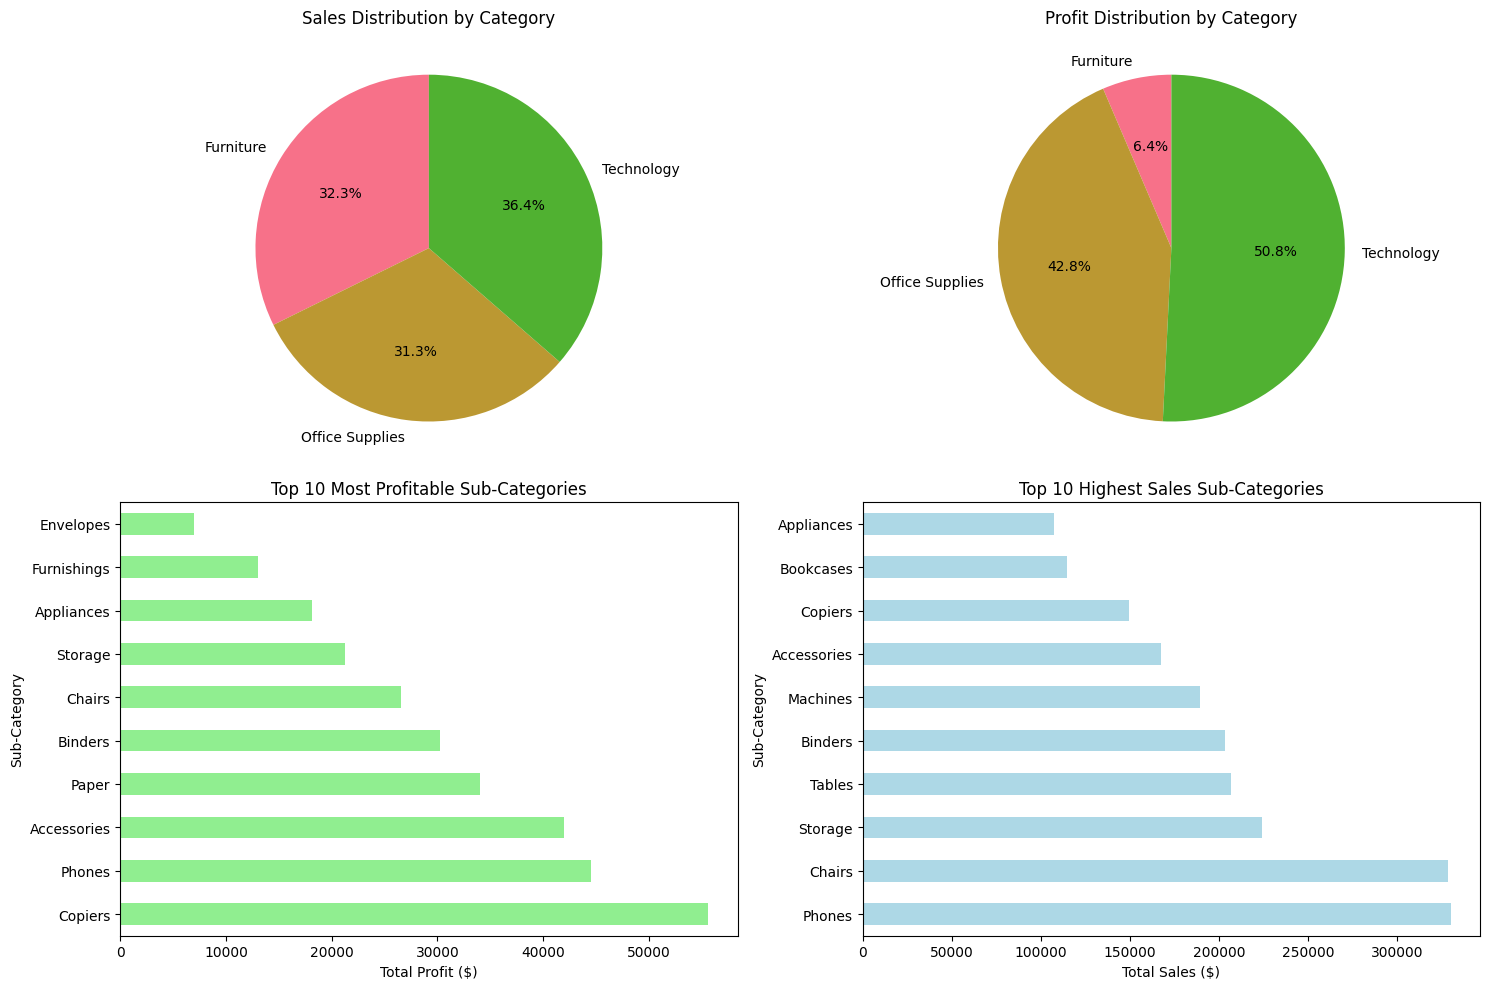

In [13]:
# Category and Sub-Category performance
category_performance = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2).sort_values('Profit', ascending=False)

print("PRODUCT CATEGORY PERFORMANCE (Sorted by Profit)")
print("=" * 60)
print(category_performance)

# Visualization
plt.figure(figsize=(15, 10))

# Sales by Category
plt.subplot(2, 2, 1)
category_sales = df.groupby('Category')['Sales'].sum()
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')

# Profit by Category
plt.subplot(2, 2, 2)
category_profit = df.groupby('Category')['Profit'].sum()
plt.pie(category_profit.values, labels=category_profit.index, autopct='%1.1f%%', startangle=90)
plt.title('Profit Distribution by Category')

# Profit by Sub-Category (Top 10)
plt.subplot(2, 2, 3)
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
subcat_profit.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Most Profitable Sub-Categories')
plt.xlabel('Total Profit ($)')

# Sales by Sub-Category (Top 10)
plt.subplot(2, 2, 4)
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
subcat_sales.plot(kind='barh', color='lightblue')
plt.title('Top 10 Highest Sales Sub-Categories')
plt.xlabel('Total Sales ($)')

plt.tight_layout()
plt.show()

REGIONAL PERFORMANCE ANALYSIS
             Sales     Profit  Order ID  Profit Margin
Region                                                
West     725457.82  108418.45      3203          21.95
East     678781.24   91522.78      2848          16.72
South    391721.90   46749.43      1620          16.35
Central  501239.89   39706.36      2323         -10.41


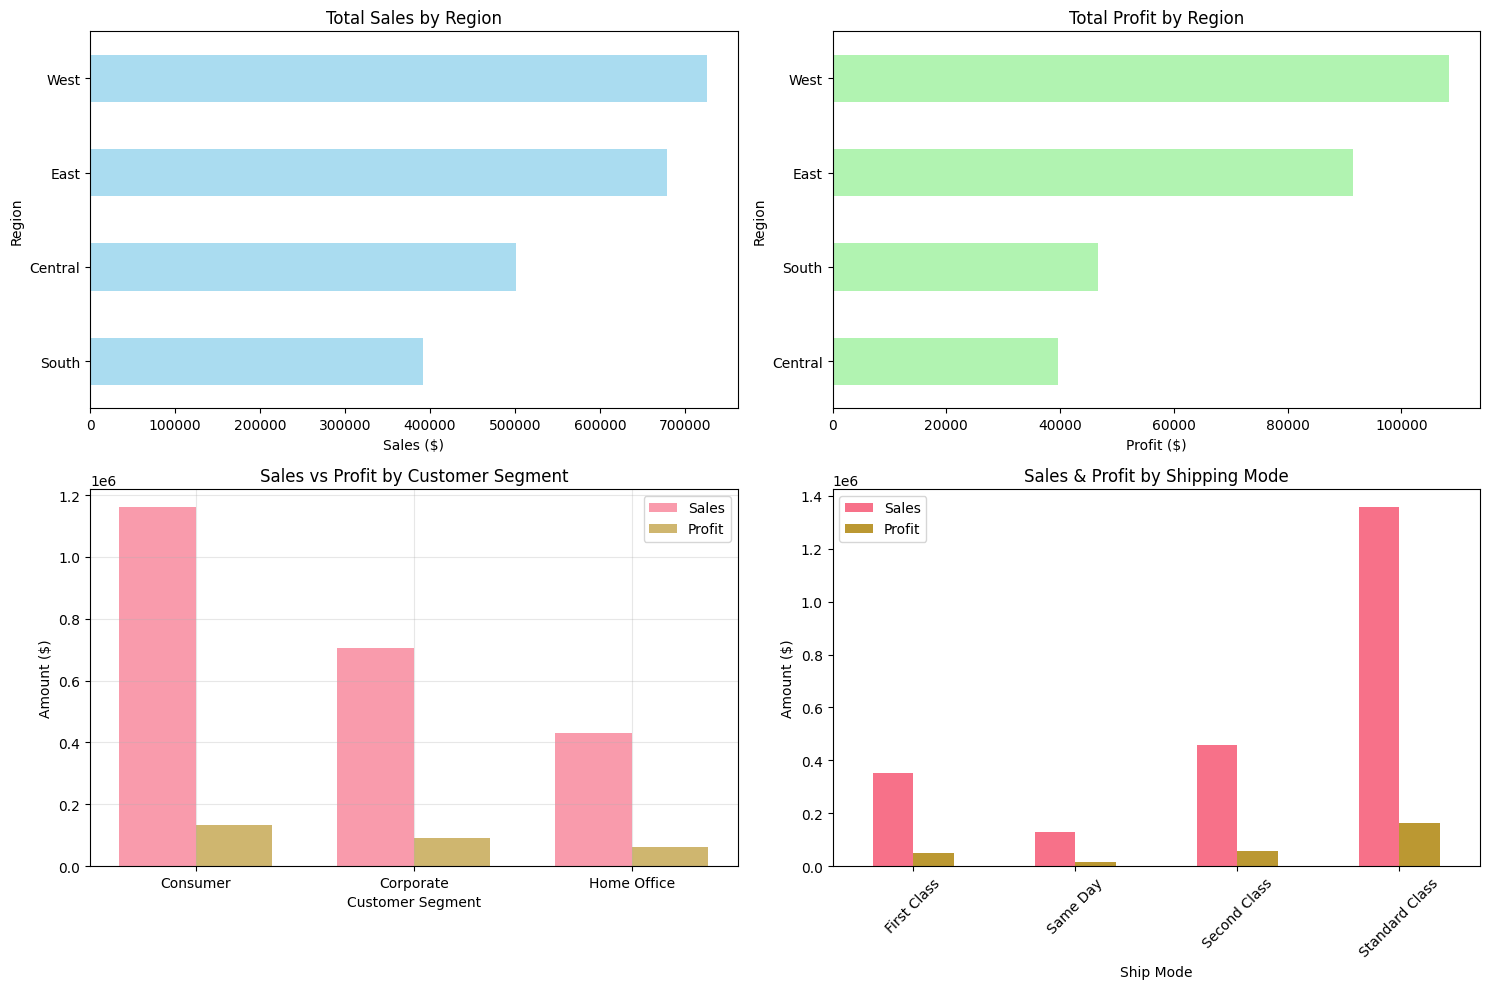

In [14]:
# Regional Performance Analysis
print("REGIONAL PERFORMANCE ANALYSIS")
print("=" * 50)

regional_performance = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Profit Margin': 'mean'
}).round(2).sort_values('Profit', ascending=False)

print(regional_performance)

# Visualization
plt.figure(figsize=(15, 10))

# Regional Sales and Profit
plt.subplot(2, 2, 1)
regional_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
regional_sales.plot(kind='barh', color='skyblue', alpha=0.7)
plt.title('Total Sales by Region')
plt.xlabel('Sales ($)')

plt.subplot(2, 2, 2)
regional_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=True)
regional_profit.plot(kind='barh', color='lightgreen', alpha=0.7)
plt.title('Total Profit by Region')
plt.xlabel('Profit ($)')

# Customer Segment Analysis
plt.subplot(2, 2, 3)
segment_performance = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})
x = np.arange(len(segment_performance.index))
width = 0.35

plt.bar(x - width/2, segment_performance['Sales'], width, label='Sales', alpha=0.7)
plt.bar(x + width/2, segment_performance['Profit'], width, label='Profit', alpha=0.7)
plt.xlabel('Customer Segment')
plt.ylabel('Amount ($)')
plt.title('Sales vs Profit by Customer Segment')
plt.xticks(x, segment_performance.index)
plt.legend()
plt.grid(True, alpha=0.3)

# Shipping Mode Analysis
plt.subplot(2, 2, 4)
ship_mode_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Shipping Days': 'mean'
}).round(2)
ship_mode_analysis[['Sales', 'Profit']].plot(kind='bar', ax=plt.gca())
plt.title('Sales & Profit by Shipping Mode')
plt.xticks(rotation=45)
plt.ylabel('Amount ($)')

plt.tight_layout()
plt.show()

In [15]:
# Analyze the negative profit issue
print("ANALYZING NEGATIVE PROFIT ORDERS")
print("=" * 50)

# Create a flag for negative profit orders
df['Negative Profit'] = df['Profit'] < 0

negative_profit_analysis = df.groupby('Negative Profit').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Discount': 'mean'
}).round(2)

print(negative_profit_analysis)
print("\n")

# Which sub-categories have the most negative profit?
negative_profit_by_subcat = df[df['Profit'] < 0].groupby('Sub-Category').agg({
    'Profit': 'sum',
    'Order ID': 'count',
    'Discount': 'mean'
}).round(2).sort_values('Profit')

print("SUB-CATEGORIES WITH NEGATIVE PROFIT:")
print(negative_profit_by_subcat)

ANALYZING NEGATIVE PROFIT ORDERS
                      Sales     Profit  Order ID  Discount
Negative Profit                                           
False            1828493.71  442528.31      8123      0.08
True              468707.15 -156131.29      1871      0.48


SUB-CATEGORIES WITH NEGATIVE PROFIT:
                Profit  Order ID  Discount
Sub-Category                              
Binders      -38510.50       613      0.74
Tables       -32412.15       203      0.37
Machines     -30118.67        44      0.58
Bookcases    -12152.21       109      0.35
Chairs        -9880.84       235      0.26
Appliances    -8629.64        67      0.80
Phones        -7530.62       136      0.34
Furnishings   -6490.91       167      0.53
Storage       -6426.30       161      0.20
Supplies      -3015.62        33      0.20
Accessories    -930.63        91      0.20
Fasteners       -33.20        12      0.20


In [16]:
# Top Customers Analysis
print("TOP CUSTOMER ANALYSIS")
print("=" * 50)

top_customers = df.groupby(['Customer ID', 'Customer Name']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Profit Margin': 'mean'
}).round(2).sort_values('Profit', ascending=False).head(10)

print("TOP 10 MOST PROFITABLE CUSTOMERS:")
print(top_customers)

# Bottom Customers (Loss-making)
bottom_customers = df.groupby(['Customer ID', 'Customer Name']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Profit Margin': 'mean'
}).round(2).sort_values('Profit', ascending=True).head(10)

print("\nTOP 10 LEAST PROFITABLE CUSTOMERS:")
print(bottom_customers)

TOP CUSTOMER ANALYSIS
TOP 10 MOST PROFITABLE CUSTOMERS:
                                     Sales   Profit  Order ID  Profit Margin
Customer ID Customer Name                                                   
TC-20980    Tamara Chand          19052.22  8981.32        12          21.29
RB-19360    Raymond Buch          15117.34  6976.10        18          20.96
SC-20095    Sanjit Chand          14142.33  5757.41        22          26.31
HL-15040    Hunter Lopez          12873.30  5622.43        11          31.41
AB-10105    Adrian Barton         14473.57  5444.81        20          -8.31
TA-21385    Tom Ashbrook          14595.62  4703.79        10          14.50
CM-12385    Christopher Martinez   8954.02  3899.89        10          17.90
KD-16495    Keith Dawkins          8181.26  3038.63        28          24.52
AR-10540    Andy Reiter            6608.45  2884.62         9          38.44
DR-12940    Daniel Raglin          8350.87  2869.08        13           3.91

TOP 10 LEAST PROFIT

In [17]:
# EXECUTIVE SUMMARY AND KEY INSIGHTS
print("=" * 70)
print("E-COMMERCE SALES ANALYSIS - EXECUTIVE SUMMARY")
print("=" * 70)

print("\n📊 OVERALL PERFORMANCE:")
print(f"• Total Revenue: ${total_sales:,.2f}")
print(f"• Total Profit: ${total_profit:,.2f}")
print(f"• Average Profit Margin: {avg_profit_margin:.1f}%")
print(f"• Customer Base: {total_customers:,} unique customers")
print(f"• Order Volume: {total_orders:,} orders processed")

print("\n🚨 CRITICAL FINDINGS:")
print(f"• 18.7% of orders (1,871 orders) generate NEGATIVE profit")
print(f"• Central region is operating at -10.4% profit margin")
print(f"• High discount rates (48% avg) on loss-making orders vs 8% on profitable ones")
print(f"• Tables and Binders are major loss-makers despite high sales")

print("\n⭐ TOP PERFORMERS:")
print(f"• Most Profitable Category: Technology (Copiers, Phones, Accessories)")
print(f"• Best Region: West (21.95% profit margin)")
print(f"• Most Profitable Customer: Tamara Chand ($8,981 profit)")
print(f"• Most Reliable Products: Copiers (37.2% profit margin)")

print("\n🔧 PROBLEM AREAS:")
print(f"• Worst Performing Category: Furniture (Tables: -$17,725 profit)")
print(f"• Problem Region: Central (-10.4% profit margin)")
print(f"• Biggest Loss Customer: Cindy Stewart (-$6,626 profit)")

E-COMMERCE SALES ANALYSIS - EXECUTIVE SUMMARY

📊 OVERALL PERFORMANCE:
• Total Revenue: $2,297,200.86
• Total Profit: $286,397.02
• Average Profit Margin: 12.0%
• Customer Base: 793 unique customers
• Order Volume: 5,009 orders processed

🚨 CRITICAL FINDINGS:
• 18.7% of orders (1,871 orders) generate NEGATIVE profit
• Central region is operating at -10.4% profit margin
• High discount rates (48% avg) on loss-making orders vs 8% on profitable ones
• Tables and Binders are major loss-makers despite high sales

⭐ TOP PERFORMERS:
• Most Profitable Category: Technology (Copiers, Phones, Accessories)
• Best Region: West (21.95% profit margin)
• Most Profitable Customer: Tamara Chand ($8,981 profit)
• Most Reliable Products: Copiers (37.2% profit margin)

🔧 PROBLEM AREAS:
• Worst Performing Category: Furniture (Tables: -$17,725 profit)
• Problem Region: Central (-10.4% profit margin)
• Biggest Loss Customer: Cindy Stewart (-$6,626 profit)


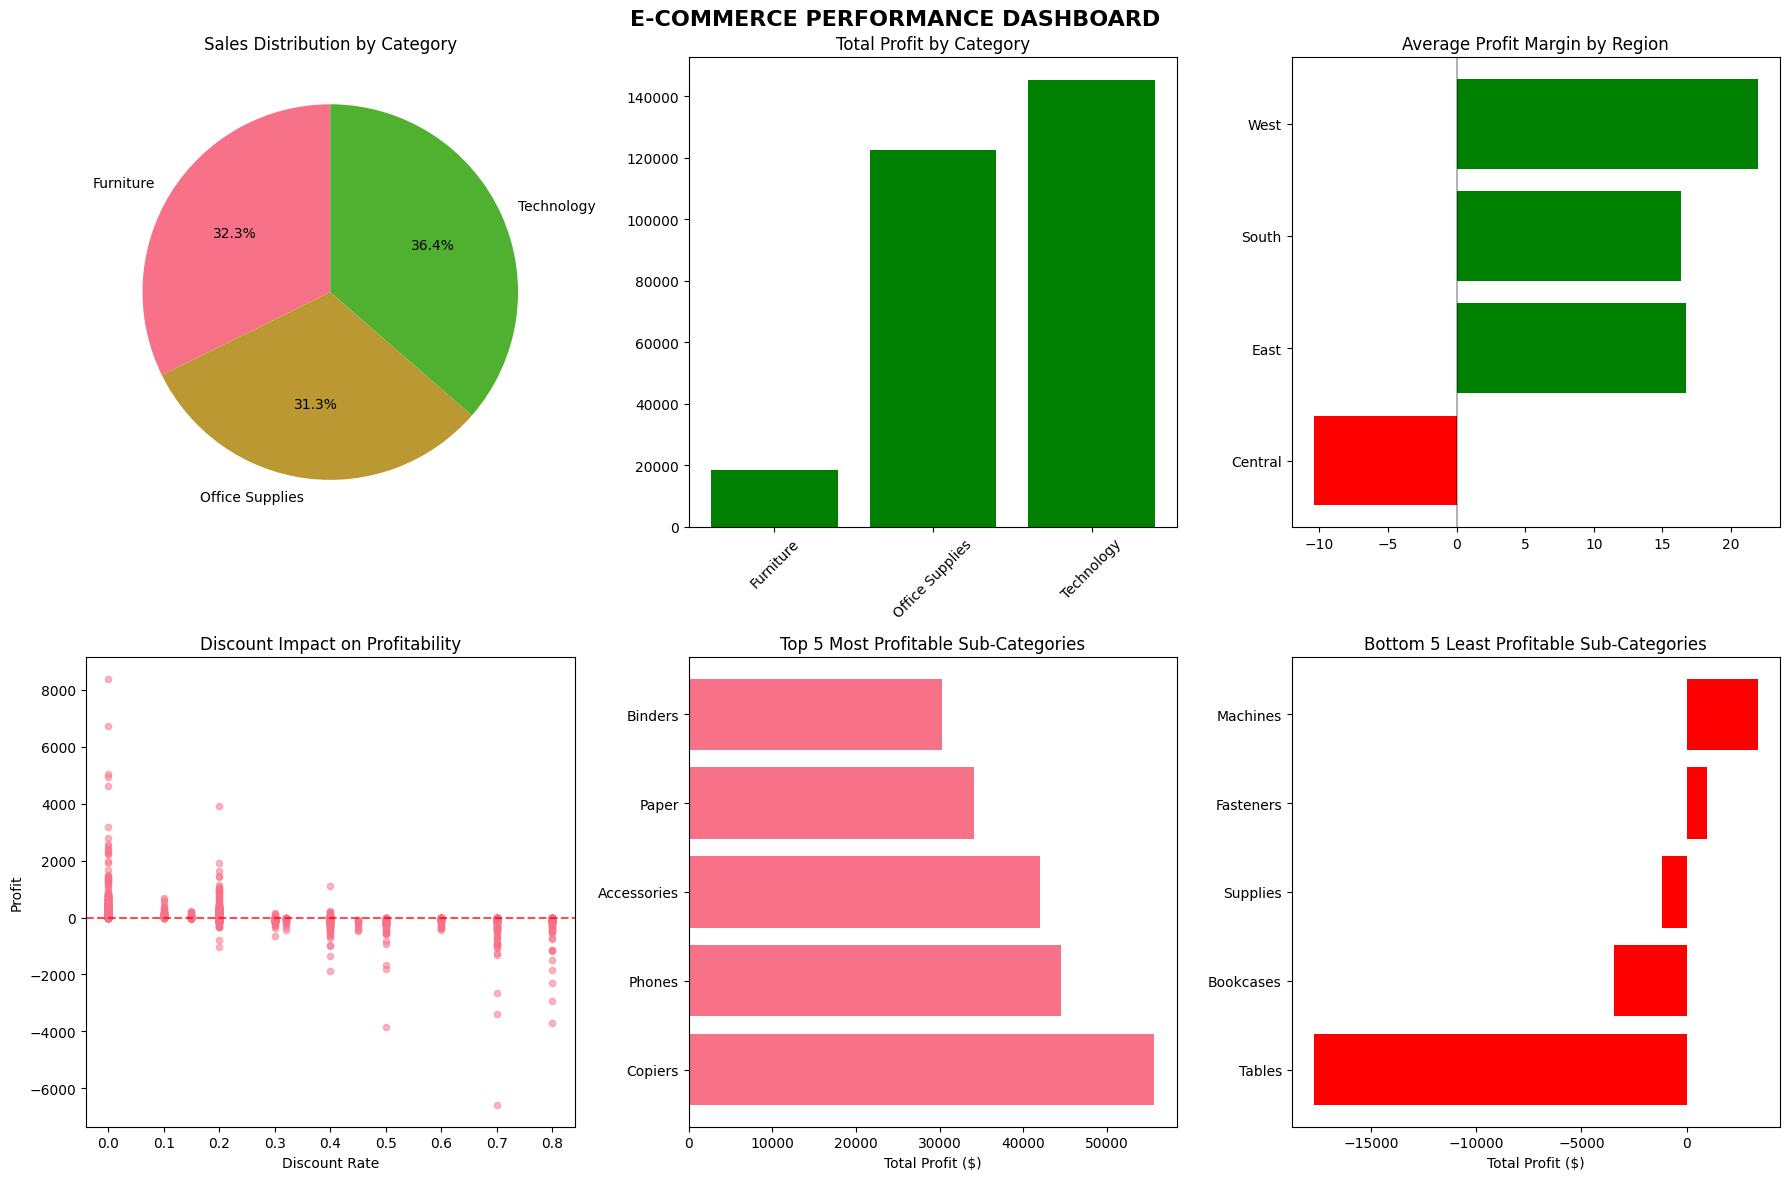

In [18]:
# Create a comprehensive dashboard of key metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('E-COMMERCE PERFORMANCE DASHBOARD', fontsize=16, fontweight='bold')

# 1. Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
axes[0,0].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Sales Distribution by Category')

# 2. Profit by Category
category_profit = df.groupby('Category')['Profit'].sum()
axes[0,1].bar(category_profit.index, category_profit.values,
              color=['red' if x < 0 else 'green' for x in category_profit.values])
axes[0,1].set_title('Total Profit by Category')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Regional Performance
regional_data = df.groupby('Region')['Profit Margin'].mean()
axes[0,2].barh(regional_data.index, regional_data.values,
               color=['red' if x < 0 else 'green' for x in regional_data.values])
axes[0,2].set_title('Average Profit Margin by Region')
axes[0,2].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 4. Discount vs Profit Analysis
axes[1,0].scatter(df['Discount'], df['Profit'], alpha=0.5, s=20)
axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[1,0].set_xlabel('Discount Rate')
axes[1,0].set_ylabel('Profit')
axes[1,0].set_title('Discount Impact on Profitability')

# 5. Top 5 Most Profitable Sub-Categories
top_profit_subcats = df.groupby('Sub-Category')['Profit'].sum().nlargest(5)
axes[1,1].barh(range(len(top_profit_subcats)), top_profit_subcats.values)
axes[1,1].set_yticks(range(len(top_profit_subcats)))
axes[1,1].set_yticklabels(top_profit_subcats.index)
axes[1,1].set_title('Top 5 Most Profitable Sub-Categories')
axes[1,1].set_xlabel('Total Profit ($)')

# 6. Bottom 5 Least Profitable Sub-Categories
bottom_profit_subcats = df.groupby('Sub-Category')['Profit'].sum().nsmallest(5)
axes[1,2].barh(range(len(bottom_profit_subcats)), bottom_profit_subcats.values, color='red')
axes[1,2].set_yticks(range(len(bottom_profit_subcats)))
axes[1,2].set_yticklabels(bottom_profit_subcats.index)
axes[1,2].set_title('Bottom 5 Least Profitable Sub-Categories')
axes[1,2].set_xlabel('Total Profit ($)')

plt.tight_layout()
plt.show()

In [19]:
# BUSINESS RECOMMENDATIONS
print("=" * 70)
print("DATA-DRIVEN BUSINESS RECOMMENDATIONS")
print("=" * 70)

print("\n🎯 PRIORITY 1: FIX PROFITABILITY ISSUES")
print("1. REVIEW DISCOUNT STRATEGY:")
print("   • Current: Loss-making orders have 48% avg discount vs 8% on profitable ones")
print("   • Action: Implement discount caps (max 20-25%) for Tables, Binders, Machines")
print("   • Target: Reduce negative profit orders from 18.7% to under 5%")

print("\n2. ADDRESS CENTRAL REGION PERFORMANCE:")
print("   • Current: -10.4% profit margin (only region with negative margin)")
print("   • Action: Audit shipping costs, pricing strategy, and local competition")
print("   • Investigate: Why Central region operates differently than others")

print("\n3. OPTIMIZE PRODUCT MIX:")
print("   • PROMOTE: Copiers (37.2% margin), Phones (13.5% margin), Accessories (25.1% margin)")
print("   • REVIEW: Tables (-8.6% margin), Binders (14.9% margin but major loss source)")
print("   • CONSIDER: Price increases or cost reduction for Furniture category")

print("\n📈 PRIORITY 2: GROWTH OPPORTUNITIES")
print("1. EXPAND WEST REGION SUCCESS:")
print("   • Replicate West region strategies (21.95% margin) to other regions")
print("   • Focus marketing budget on high-margin Technology products")

print("\n2. CUSTOMER SEGMENTATION:")
print("   • Identify characteristics of top 10 profitable customers")
print("   • Create loyalty program for high-value customers like Tamara Chand")
print("   • Review relationships with loss-making customers")

print("\n3. INVENTORY OPTIMIZATION:")
print("   • Increase stock of high-margin Technology products")
print("   • Reduce inventory of low-margin Furniture items")
print("   • Implement dynamic pricing based on real-time demand")

print(f"\n💡 EXPECTED IMPACT:")
print(f"• Fixing Central region alone could add ${abs(501239.89 * 0.104):,.0f} to profits")
print(f"• Reducing negative profit orders by 50% could save ${156131.29 * 0.5:,.0f}")
print(f"• Small improvements in discount strategy could significantly boost margins")

DATA-DRIVEN BUSINESS RECOMMENDATIONS

🎯 PRIORITY 1: FIX PROFITABILITY ISSUES
1. REVIEW DISCOUNT STRATEGY:
   • Current: Loss-making orders have 48% avg discount vs 8% on profitable ones
   • Action: Implement discount caps (max 20-25%) for Tables, Binders, Machines
   • Target: Reduce negative profit orders from 18.7% to under 5%

2. ADDRESS CENTRAL REGION PERFORMANCE:
   • Current: -10.4% profit margin (only region with negative margin)
   • Action: Audit shipping costs, pricing strategy, and local competition
   • Investigate: Why Central region operates differently than others

3. OPTIMIZE PRODUCT MIX:
   • PROMOTE: Copiers (37.2% margin), Phones (13.5% margin), Accessories (25.1% margin)
   • REVIEW: Tables (-8.6% margin), Binders (14.9% margin but major loss source)
   • CONSIDER: Price increases or cost reduction for Furniture category

📈 PRIORITY 2: GROWTH OPPORTUNITIES
1. EXPAND WEST REGION SUCCESS:
   • Replicate West region strategies (21.95% margin) to other regions
   • Foc

In [20]:
# Save the cleaned and enhanced dataset for Tableau
df.to_csv('cleaned_superstore_data.csv', index=False)

# Download the file to your computer
from google.colab import files
files.download('cleaned_superstore_data.csv')

print("✅ Cleaned dataset saved and downloaded successfully!")
print("📊 You can now upload this file to Tableau Public to create your dashboard.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Cleaned dataset saved and downloaded successfully!
📊 You can now upload this file to Tableau Public to create your dashboard.


In [22]:
# Create summary tables that will be useful for Tableau
print("Creating summary tables for Tableau dashboard...")

# 1. Monthly Trends
monthly_summary = df.groupby('Order Year-Month').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': 'count',
    'Profit Margin': 'mean'
}).reset_index()
monthly_summary['Order Year-Month'] = monthly_summary['Order Year-Month'].astype(str)

# 2. Regional Performance
regional_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean',
    'Order ID': 'count'
}).reset_index()

# 3. Category Performance
category_summary = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean',
    'Order ID': 'count'
}).reset_index()

# 4. Customer Segmentation
customer_summary = df.groupby(['Customer ID', 'Customer Name', 'Segment', 'Region']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Profit Margin': 'mean'
}).reset_index()

# 5. Shipping Analysis
shipping_summary = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Shipping Days': 'mean',
    'Order ID': 'count'
}).reset_index()

# Save all summary files
monthly_summary.to_csv('monthly_summary.csv', index=False)
regional_summary.to_csv('regional_summary.csv', index=False)
category_summary.to_csv('category_summary.csv', index=False)
customer_summary.to_csv('customer_summary.csv', index=False)
shipping_summary.to_csv('shipping_summary.csv', index=False)

print("Summary files created successfully!")
print("Files created:")
print("- monthly_summary.csv")
print("- regional_summary.csv")
print("- category_summary.csv")
print("- customer_summary.csv")
print("- shipping_summary.csv")

# Download all files
files.download('monthly_summary.csv')
files.download('regional_summary.csv')
files.download('category_summary.csv')
files.download('customer_summary.csv')
files.download('shipping_summary.csv')

Creating summary tables for Tableau dashboard...
Summary files created successfully!
Files created:
- monthly_summary.csv
- regional_summary.csv
- category_summary.csv
- customer_summary.csv
- shipping_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>